# DATA SCIENCE TASK AT THE SPARKS FOUNDATION @GRIPMAY21
## TASK 5 - Exploratory Data Analysis - Sports
### AIM:
 - To find most successful teams, players and factors contributing win or loss of a team. 
 - To suggest teams or players a company should endorse for its products. 
## by- Deepika Bisht

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset 
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

In [3]:
# exploring data
df1.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [4]:
df2.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### Data Cleansing  

In [6]:
#We can drop column called umpire3.
df1=df1.drop(['umpire1', 'umpire2','umpire3'],axis=1)

We have dropped the umpire1, umpire2, umpire3 columns from the dataset as it is not needed according to the analysis that has been asked us to do.

In [7]:
# now checking shape again
df1.shape

(756, 15)

In [8]:
# Now checking info again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


In [9]:
df1.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

Here we can see that there are missing values for "City","winner" and "player_of_match". They are processed in next step.

In [10]:
df1['city']=df1['city'].fillna(0)
df1['winner']=df1['winner'].fillna(0)
df1['player_of_match']=df1['player_of_match'].fillna(0)
df1.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

Now,there are no longer any missing values

In [11]:
df1.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### EXPLORATORY DATA ANALYSIS

#### where Maximum no. of matches were hosted.

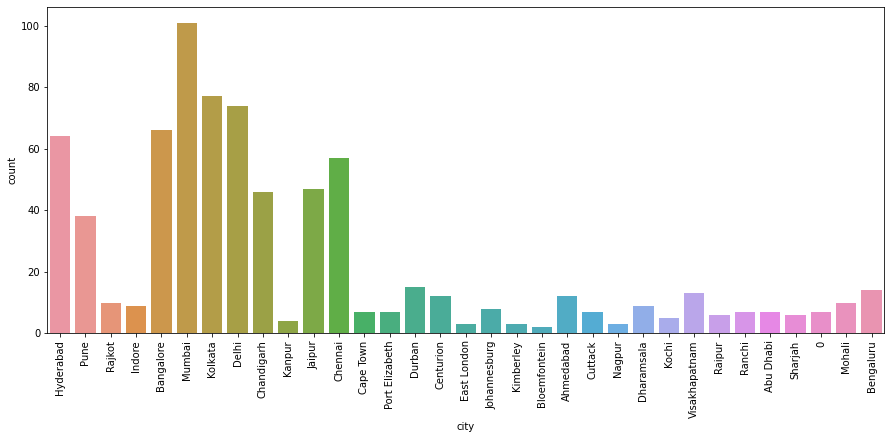

In [12]:
plt.figure(figsize = (15,6))
plt.xticks(rotation = 'vertical')
sns.countplot(x = 'city', data = df1)


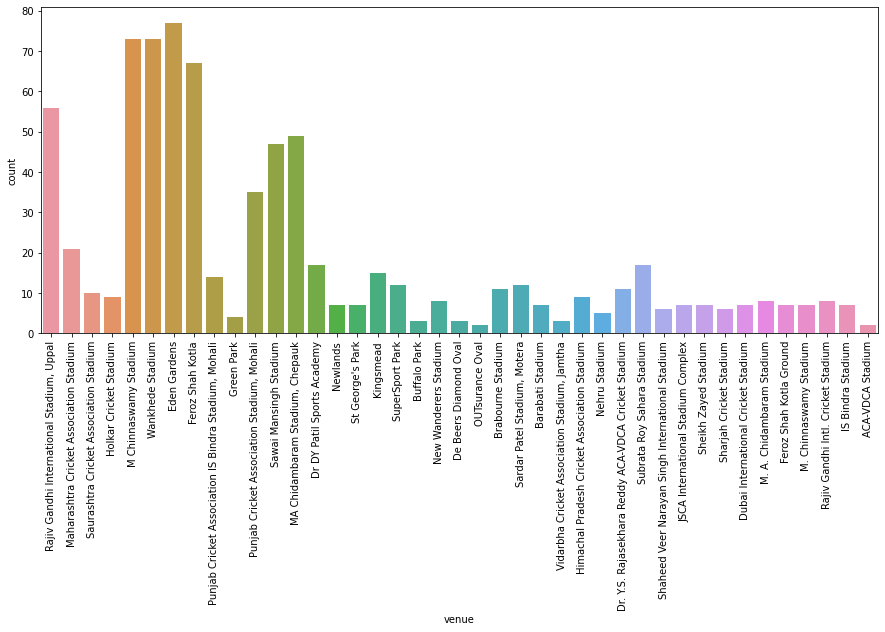

In [13]:
plt.figure(figsize = (15,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'venue', data = df1)

Mumbai in total hosted the maximum number of matches but Eden gardens of kolkata is recorded as the stadium where the maximum number of matches has been played.

#### Successful team

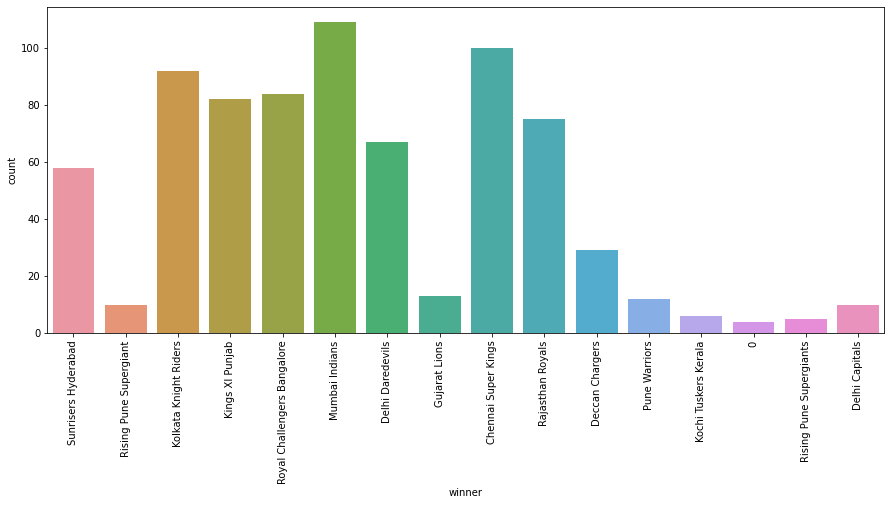

In [14]:
plt.figure(figsize = (15,6))
plt.xticks(rotation = 90)
sns.countplot(x = 'winner', data = df1)

In [15]:
df1["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
0                                4
Name: winner, dtype: int64

 MUMBAI INDIANS is the most successfull team in all the IPL. They are followed by CSK and KKR.

#### Analysis for factors to win or lose

In [17]:
winning_team = df1.toss_winner == df1.winner
win = winning_team.value_counts()
win

True     393
False    363
dtype: int64

Total matches that were played are 756 out of which 393 matches were won by the toss winning team and 363 matches were won by the team that lost the toss.

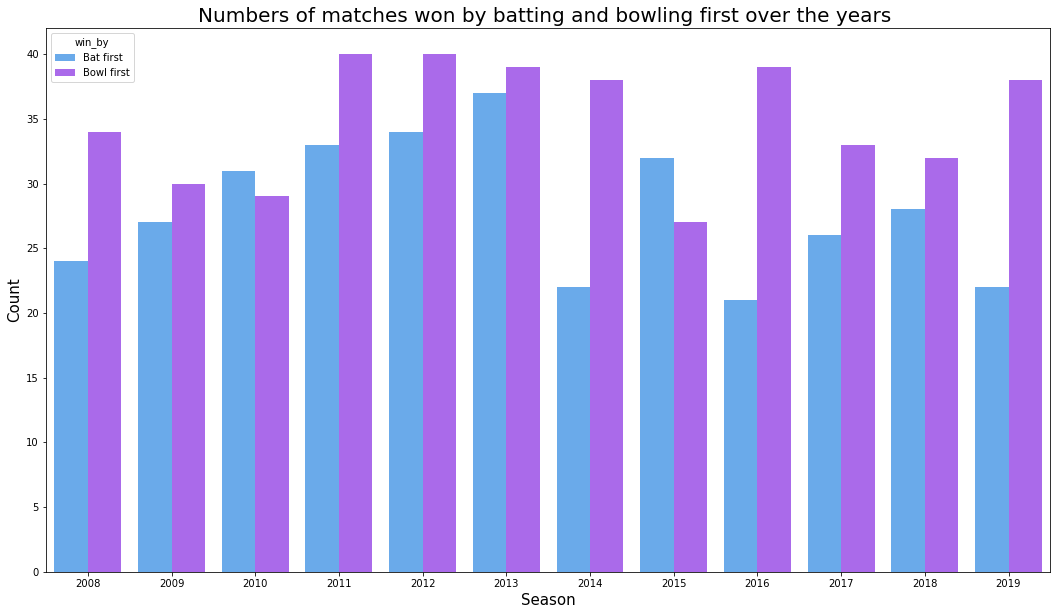

In [18]:
df1['win_by']=np.where(df1['win_by_runs']>0,'Bat first','Bowl first')

plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by', data=df1, palette='cool')
plt.title("Numbers of matches won by batting and bowling first over the years ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()


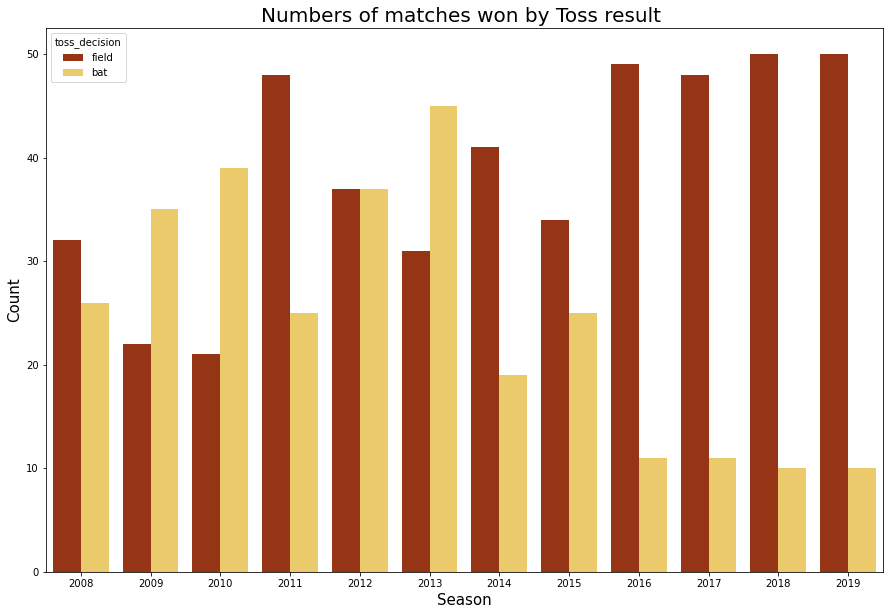

In [19]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (15,10))
sns.countplot('season',hue='toss_decision',data=df1,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

#### Successful player

In [20]:
df1.player_of_match.value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
TA Boult           1
AC Voges           1
LJ Wright          1
JJ Roy             1
S Sohal            1
Name: player_of_match, Length: 227, dtype: int64

<Figure size 1296x720 with 0 Axes>

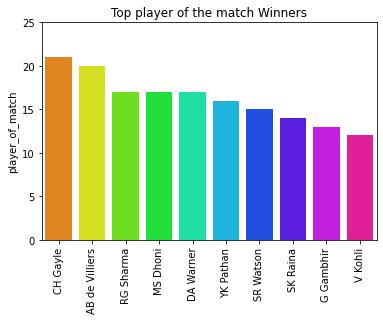

In [21]:
# As data is so large so plotting graph for top 10 players OF MATCH
plt.figure(figsize = (18,10))
top_players = df1.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

the most number of man of the matches was won by "CH GAYLE", followed by "AB de Villiers just one man less". Also the least number of man of the match is bagged by MR MARSH.

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

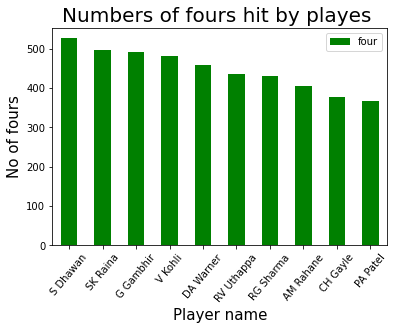

In [23]:
four_data=df2[df2['batsman_runs']==4]
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='green')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

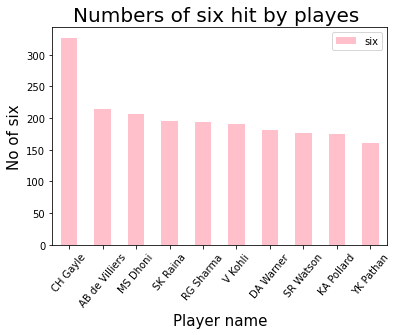

In [24]:
# we will plot graph of six hit by players
six_data=df2[df2['batsman_runs']==6]

batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='pink')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

In [25]:
# We will print the top 10 leading run scorer in IPL
batsman_score=df2.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print(" Top 10 Leading Run Scorer in IPL ")
batsman_score.iloc[:10,:]

 Top 10 Leading Run Scorer in IPL 


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


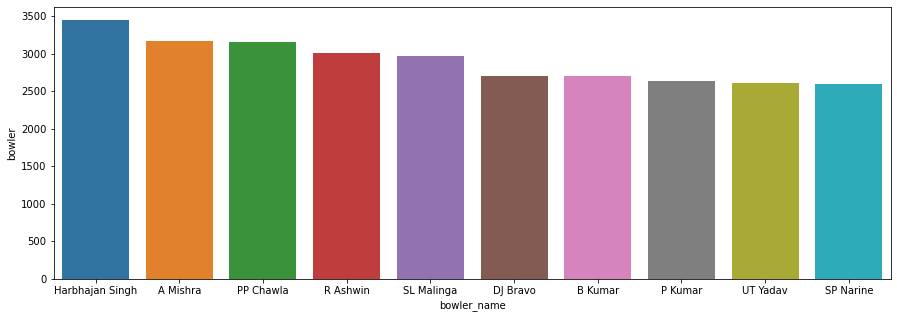

In [26]:
plt.figure(figsize = (15,5))
plt.xlabel(xlabel = 'bowler_name')
plt.ylabel(ylabel = 'count')
bowler_stats = df2.bowler.value_counts()
bowler_stats1 = bowler_stats[:10]
sns.barplot(bowler_stats1.index, bowler_stats1)

Harbajan Singh has bowled the maximum number of time.

# Conclusion

#### - Mumbai in total hosted the maximum number of matches but Eden gardens of kolkata is recorded as the stadium where the maximum number of matches has been played.

#### - The MUMBAI INDIANS is the most successfull team with 109 wins overall in  the IPL,  followed by Chennai Super Kings and Kolkata Knight Riders.
#### - The most successful player on the basis of most player of the match awards CH Gayle(21), followed by AB de Villers(20) and RG sharma, MS Dhoni, DA Warner with 17 awards.

#### - Factors contributing to win/loss:
    - Toss winning has an impact on winning the match.
    - When fielding is choosen in toss decision, there are more chances of winning.
    - over the seasons,it has been observed that who bowls first wins.

#### - Teams or Players a company should endorse for its products:
     - The teams that should be considered for endorsement are Mumbai Indians,Chennai Super Kings and Kolkata Knight Riders.
     - The players that should be considered for endorsement are CH Gayle, AB de Villiers, MS Dhoni,  SK Raina, Virat Kohli, RG Sharma, Harbhajan Singh, Amit Mishra, R Ashwin


